<a href="https://colab.research.google.com/github/NamanT98/gnn-classification/blob/main/Solubility_of_Chemicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 51.4 MB/s eta 0:00:00


In [2]:
import torch

In [3]:
torch.__version__

'2.1.0+cu118'

In [4]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.1 MB/s eta 0:00:00


In [5]:
import rdkit
from torch_geometric.datasets import MoleculeNet

data=MoleculeNet(root='.',name='ESOL')
data

Processing...
Done!


ESOL(1128)

In [6]:
print("data type",type(data))
# print("data shape",)
print("data features",data.num_features)
print("data target",data.num_classes)
print("data length",data.len())
print("data sample",data[0])
print("sample nodes",data[0].num_nodes)
print("sample edges",data[0].num_edges)

data type <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
data features 9
data target 734
data length 1128
data sample Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])
sample nodes 32
sample edges 68


In [7]:
data[0].x

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [8]:
data[0].y

tensor([[-0.7700]])

In [9]:
data[0].edge_index.t()

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [10]:
data[0]['smiles']

'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '

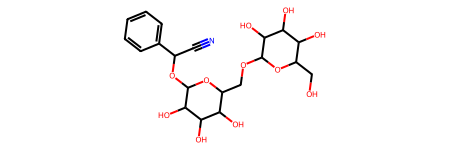

In [11]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
molecule=Chem.MolFromSmiles(data[0]['smiles'])
molecule


In [12]:
type(molecule)

rdkit.Chem.rdchem.Mol

In [13]:
import torch
from torch.nn import Linear
import torch.nn.functional as f
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

In [14]:
embedding_size=64

In [15]:
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(42)

        self.initial_conv=GCNConv(data.num_features,embedding_size)
        self.conv1=GCNConv(embedding_size,embedding_size)
        self.conv2=GCNConv(embedding_size,embedding_size)
        self.conv3=GCNConv(embedding_size,embedding_size)

        self.out=Linear(embedding_size*2,1)

    def forward(self,x,edge_index,batch_index):
        layer=self.initial_conv(x,edge_index)
        layer=f.tanh(layer)


        layer=self.conv1(layer,edge_index)
        layer=f.tanh(layer)
        layer=self.conv2(layer,edge_index)
        layer=f.tanh(layer)
        layer=self.conv3(layer,edge_index)
        layer=f.tanh(layer)

        layer=torch.cat([gmp(layer,batch_index),
                         gap(layer,batch_index)],dim=1)

        out=self.out(layer)

        return out,layer

model=GCN()
print(model)

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)


In [16]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

# Root mean squared error
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

# Use GPU for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Wrap data in a data loader
data_size = len(data)
NUM_GRAPHS_PER_BATCH = 64
loader = DataLoader(data[:int(data_size * 0.8)],
                    batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(data[int(data_size * 0.8):],
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

def train(data):
    # Enumerate over the data
    for batch in loader:
      # Use GPU
      batch.to(device)
      # Reset gradients
      optimizer.zero_grad()
      # Passing the node features and the connection info
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
      # Calculating the loss and gradients
      loss = loss_fn(pred, batch.y)
      loss.backward()
      # Update using the gradients
      optimizer.step()
    return loss, embedding

print("Starting training...")
losses = []
for epoch in range(2000):
    loss, h = train(data)
    losses.append(loss)
    if epoch % 100 == 0:
      print(f"Epoch {epoch} | Train Loss {loss}")

Starting training...
Epoch 0 | Train Loss 11.665948867797852
Epoch 100 | Train Loss 0.8488144874572754
Epoch 200 | Train Loss 1.1199548244476318
Epoch 300 | Train Loss 0.32381755113601685
Epoch 400 | Train Loss 0.23959821462631226
Epoch 500 | Train Loss 0.35470932722091675
Epoch 600 | Train Loss 0.24231112003326416
Epoch 700 | Train Loss 0.07064132392406464
Epoch 800 | Train Loss 0.16499793529510498
Epoch 900 | Train Loss 0.13366198539733887
Epoch 1000 | Train Loss 0.0792323648929596
Epoch 1100 | Train Loss 0.06634803116321564
Epoch 1200 | Train Loss 0.10685263574123383
Epoch 1300 | Train Loss 0.051321521401405334
Epoch 1400 | Train Loss 0.038467079401016235
Epoch 1500 | Train Loss 0.01689336448907852
Epoch 1600 | Train Loss 0.03419620916247368
Epoch 1700 | Train Loss 0.024089856073260307
Epoch 1800 | Train Loss 0.10200770944356918
Epoch 1900 | Train Loss 0.08444534987211227


In [17]:
import pandas as pd

# Analyze the results for one batch
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

,y_real,y_pred
0,0.940,0.271844
1,-6.237,-2.779219
2,-2.540,-2.920040
3,-5.680,-5.531497
4,-2.460,-1.670179
...,...,...
59,-1.890,-1.451234
60,-2.218,-4.802650
61,-3.583,-1.743888
62,-2.580,-2.481296


In [19]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE: ",mean_squared_error(df['y_real'],df['y_pred']))
print("r2_score: ",r2_score(df['y_real'],df['y_pred']))

MSE:  1.0121884066674869
r2_score:  0.6468555404587428


<Axes: xlabel='y_real', ylabel='y_pred'>

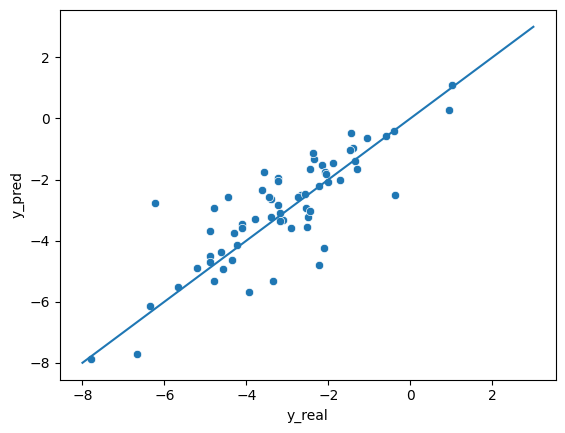

In [20]:
import seaborn as sns
sns.scatterplot(data=df, x="y_real", y="y_pred")
sns.lineplot(x=[*range(-8,4)],y=[*range(-8,4)])